# 1. Importing the required libraries for EDA

     
     Importing the libraries necessary for this project. We can add some   
     aliases to make the libraries easier to use in our code and set a 
     default figure size for further plots.

     

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for visualisation design                                          
%matplotlib inline
sns.set(color_codes=True)

# 2. Loading the Dataset 

      Loading the data into the pandas data frame is certainly one of the 
      most important steps in EDA, as we can see that the value from the 
      data set is comma-separated. So all we haveb to do is to just read the
      CSV into a data frame and pandas data frame does the job for us.

In [104]:
df=pd.read_csv("D:\Dataset\Car_Data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 3. Attribute info and types

In [105]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [106]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# 4. Dataset Exploration 
  
      In this I explored the entire dataset.

Dataset Size

In [107]:
df.shape

(11914, 16)

In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Method **`describe`** shows the main statistical characteristics of the dataset for each numerical feature (`int64` and `float64` types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [109]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


To see the statistics on non-numeric features, we need to explicitly specify the feature types by the `include` parameter. We can also set `include = all` to output statistics on all the existing features.

In [110]:
df.describe(include = ["object"])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


# 5. Drop irrelevant  columns

       This step in very necessary in EDA because sometimes there would be          many columns that we never use in such cases dropping that columns is        the best solution. In this case the columns such as Market Category ,        Vehicle style , Number of doors , Vehicle size doesn't make any              sense.  

In [111]:
dfx=df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'],axis=1)
dfx.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# 6. Rename the columns
       
      If some column names are confusing to read, just change their names.         This is a good approach to improve the readability of the dataset. 

In [112]:
dfx=dfx.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Trans_Type","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H:","city mpg":"MPG-C","MSRP":"Price"}) 
dfx.head(10)

,Make,Model,Year,HP,Cylinders,Trans_Type,Drive Mode,MPG-H:,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


# 7. Dropping duplicate rows
 
      This step is often required because a huge data set sometimes contain some duplicate data which might be disturbing.So,removing duplicate data is a handy thing.   

In [113]:
print("Number of duplicate rows: ",dfx[dfx.duplicated()])

Number of duplicate rows:           Make     Model  Year     HP  Cylinders Trans_Type         Drive Mode  \
14        BMW  1 Series  2013  230.0        6.0     MANUAL   rear wheel drive   
18       Audi       100  1992  172.0        6.0     MANUAL  front wheel drive   
20       Audi       100  1992  172.0        6.0     MANUAL  front wheel drive   
24       Audi       100  1993  172.0        6.0     MANUAL  front wheel drive   
25       Audi       100  1993  172.0        6.0     MANUAL  front wheel drive   
...       ...       ...   ...    ...        ...        ...                ...   
11481  Suzuki      X-90  1998   95.0        4.0     MANUAL   four wheel drive   
11603   Volvo      XC60  2017  302.0        4.0  AUTOMATIC    all wheel drive   
11604   Volvo      XC60  2017  240.0        4.0  AUTOMATIC  front wheel drive   
11708  Suzuki       XL7  2008  252.0        6.0  AUTOMATIC    all wheel drive   
11717  Suzuki       XL7  2008  252.0        6.0  AUTOMATIC  front wheel drive   



In [114]:
dfx.count()

Make          11914
Model         11914
Year          11914
HP            11845
Cylinders     11884
Trans_Type    11914
Drive Mode    11914
MPG-H:        11914
MPG-C         11914
Price         11914
dtype: int64

In [115]:
dfx=dfx.drop_duplicates()

Now check the no. of instances.  

In [116]:
dfx.count()

Make          10925
Model         10925
Year          10925
HP            10856
Cylinders     10895
Trans_Type    10925
Drive Mode    10925
MPG-H:        10925
MPG-C         10925
Price         10925
dtype: int64

# 8. Dropping the missing or null values
   
      This is mostly similar to the previous step but here all the missing values are detected and are dropped later.Though,it is not a good approach to do so compare to replacing the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10,000 values, this is small and negligible so I just dropped those values.

In [117]:
print(dfx.isnull().sum())

Make           0
Model          0
Year           0
HP            69
Cylinders     30
Trans_Type     0
Drive Mode     0
MPG-H:         0
MPG-C          0
Price          0
dtype: int64


In [118]:
dfx=dfx.dropna()
dfx.count()

Make          10827
Model         10827
Year          10827
HP            10827
Cylinders     10827
Trans_Type    10827
Drive Mode    10827
MPG-H:        10827
MPG-C         10827
Price         10827
dtype: int64

In [119]:
print(dfx.isnull().sum()) 

Make          0
Model         0
Year          0
HP            0
Cylinders     0
Trans_Type    0
Drive Mode    0
MPG-H:        0
MPG-C         0
Price         0
dtype: int64


# 9. Detecting Outliers

       An Outlier is a point or set of points that are different from other points.Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP,Cylinders, Horsepower and EngineSize.Here some points are outside the box they are none other than outliers.

<Axes: xlabel='Price'>

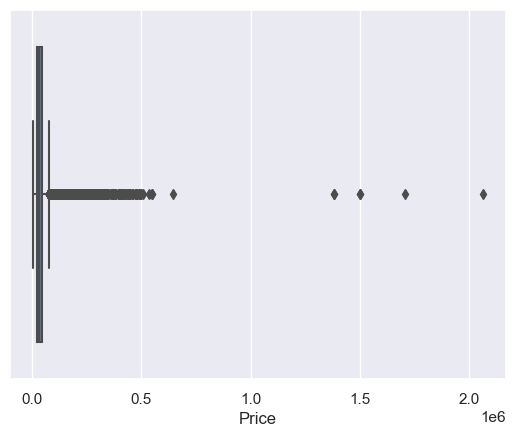

In [120]:
sns.boxplot(x=dfx['Price'])

<Axes: xlabel='HP'>

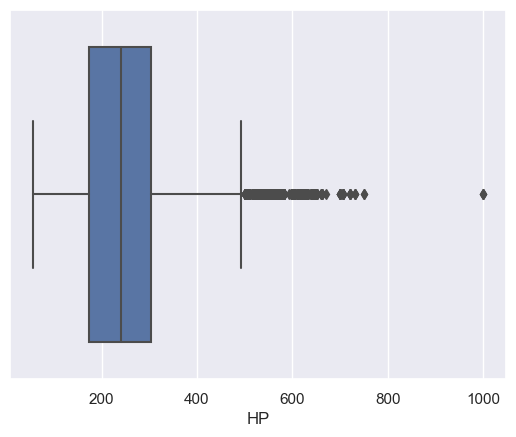

In [121]:
sns.boxplot(x=dfx['HP'])

<Axes: xlabel='Cylinders'>

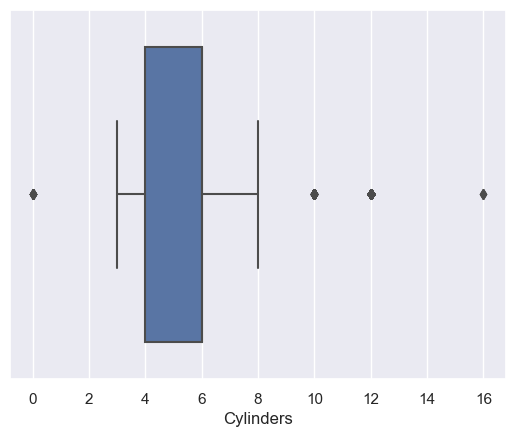

In [122]:
sns.boxplot(x=dfx['Cylinders'])

In [123]:
# dfx_numeric = dfx.select_dtypes(include=[np.number])
# Q1=dfx_numeric.quantile(0.25)
# Q3=dfx_numeric.quantile(0.75)
# IQR=Q3-Q1
# print(IQR)

In [124]:
# dfx= dfx_numeric[~((dfx_numeric<(Q1 - 1.5 * IQR)) |(dfx_numeric> (Q3 + 1.5 * IQR))).any(axis=1)]
# dfx.shape

# 10. Plot different features against one another(scatter), against   frequency(histogram)

In [ ]:
Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different
types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this
histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

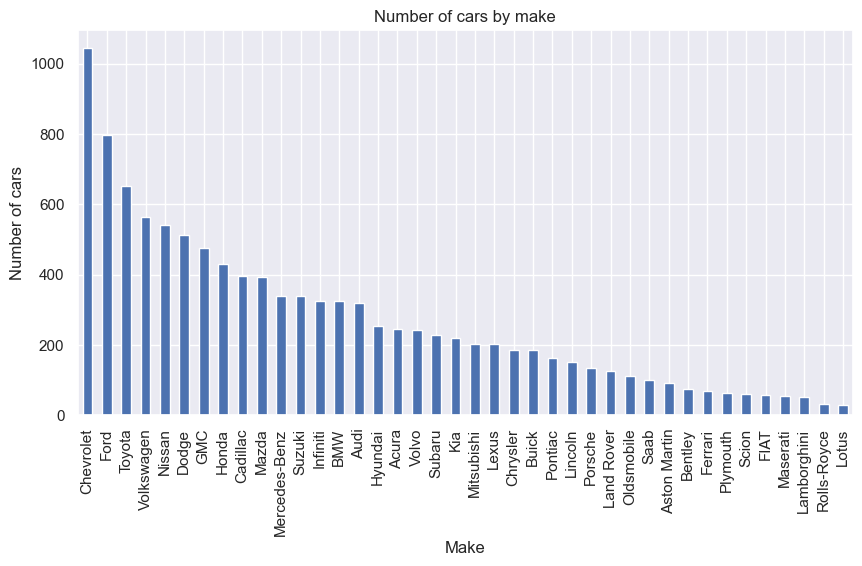

In [127]:
dfx.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

In [ ]:
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find
the relationship between the features can be done using heat maps. In the below heat map we know that the price feature
depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H:,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H:,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


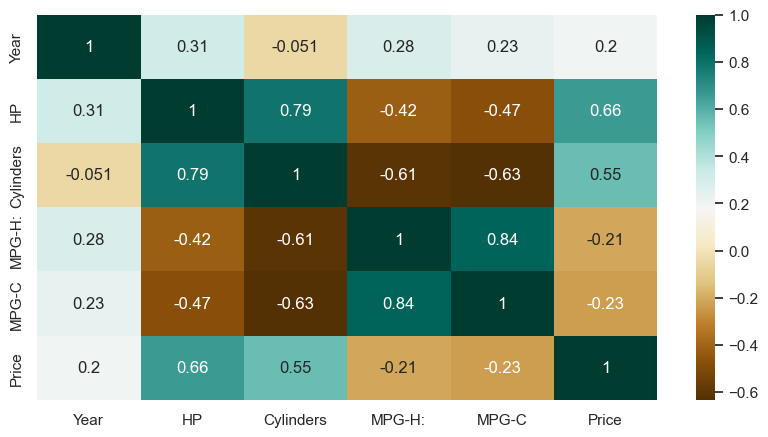

In [131]:
dfx_numeric = dfx.select_dtypes(include=[np.number]) #selecting numeric columns
plt.figure(figsize=(10,5))
c= dfx_numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

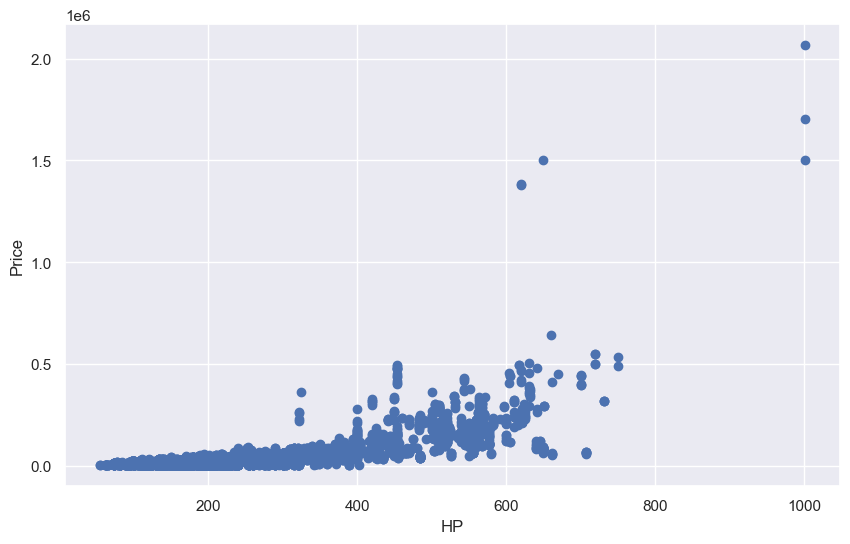

In [132]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dfx['HP'], dfx['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()